# One Way Anova

In [1]:
#Load your packages
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pa



%matplotlib inline

In [2]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

# Time For Data 

In [2]:
data = pa.read_csv('Trash.csv') #this is the file from exam 2

In [3]:
data

,HHSIZE,METAL,PAPER,PLAS,GLASS,FOOD,YARD,TEXT,OTHER,TOTAL
0,2,1.09,2.41,0.27,0.86,1.04,0.38,0.05,4.66,10.76
1,3,1.04,7.57,1.41,3.46,3.68,0.00,0.46,2.34,19.96
2,3,2.57,9.55,2.19,4.52,4.43,0.24,0.50,3.60,27.60
3,6,3.02,8.82,2.83,4.92,2.98,0.63,2.26,12.65,38.11
4,4,1.50,8.72,2.19,6.31,6.30,0.15,0.55,2.18,27.90
5,2,2.10,6.96,1.81,2.49,1.46,4.58,0.36,2.14,21.90
6,1,1.93,6.83,0.85,0.51,8.82,0.07,0.60,2.22,21.83
7,5,3.57,11.42,3.05,5.81,9.62,4.76,0.21,10.83,49.27
8,6,2.32,16.08,3.42,1.96,4.41,0.13,0.81,4.14,33.27
9,4,1.89,6.38,2.10,17.67,2.73,3.86,0.66,0.25,35.54


In [4]:
#Let's apply the anova to see if the averages of all the columns are the same.  I will use  
#METAL 	PAPER 	PLAS 	GLASS 	FOOD 	YARD 	TEXT 	OTHER as those have a possibility of all being the same.
X = np.array(data.iloc[:,1:9])

In [5]:
X #nparray now.

array([[  1.09000000e+00,   2.41000000e+00,   2.70000000e-01,
          8.60000000e-01,   1.04000000e+00,   3.80000000e-01,
          5.00000000e-02,   4.66000000e+00],
       [  1.04000000e+00,   7.57000000e+00,   1.41000000e+00,
          3.46000000e+00,   3.68000000e+00,   0.00000000e+00,
          4.60000000e-01,   2.34000000e+00],
       [  2.57000000e+00,   9.55000000e+00,   2.19000000e+00,
          4.52000000e+00,   4.43000000e+00,   2.40000000e-01,
          5.00000000e-01,   3.60000000e+00],
       [  3.02000000e+00,   8.82000000e+00,   2.83000000e+00,
          4.92000000e+00,   2.98000000e+00,   6.30000000e-01,
          2.26000000e+00,   1.26500000e+01],
       [  1.50000000e+00,   8.72000000e+00,   2.19000000e+00,
          6.31000000e+00,   6.30000000e+00,   1.50000000e-01,
          5.50000000e-01,   2.18000000e+00],
       [  2.10000000e+00,   6.96000000e+00,   1.81000000e+00,
          2.49000000e+00,   1.46000000e+00,   4.58000000e+00,
          3.60000000e-01,   2.1

(1.0916575959610366, 2.2177419354838706, 0.97865872448040636)

<Figure size 432x288 with 0 Axes>

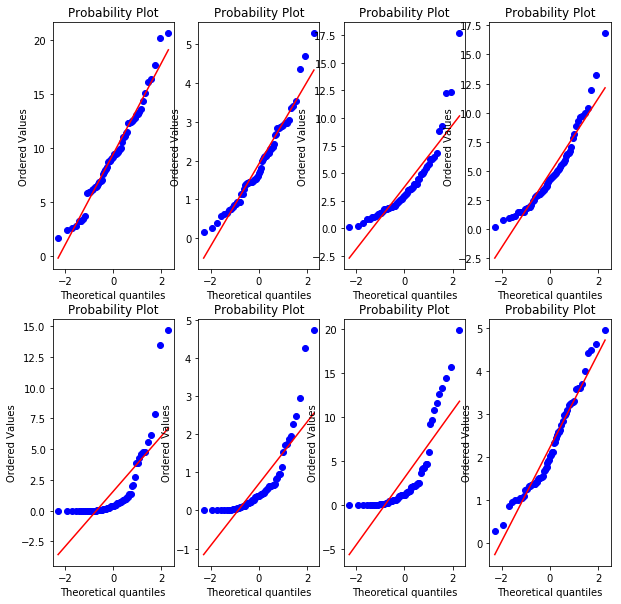

In [23]:
#Lets check the appropriateness of running anova!
#Independance?  Sure
#Normal?
from pylab import *
fig = plt.figure();
figure(figsize=(10,10));

subplot(2,4,1).axes.set_title('Paper');
stats.probplot(X[:,1], plot = plt)[-1]

subplot(2,4,2).axes.set_title('Plastic');
stats.probplot(X[:,2], plot = plt)[-1]

subplot(2,4,3);
stats.probplot(X[:,3], plot = plt)[-1]

subplot(2,4,4);
stats.probplot(X[:,4], plot = plt)[-1]

subplot(2,4,5);
stats.probplot(X[:,5], plot = plt)[-1]

subplot(2,4,6);
stats.probplot(X[:,6], plot = plt)[-1]

subplot(2,4,7);
stats.probplot(X[:,7], plot = plt)[-1]

subplot(2,4,8);
stats.probplot(X[:,0], plot = plt)[-1]



Not really all normal, but the show must go on!

In [27]:
#population standard deviations are the same? Clearly going to assume, but lets check the sample deviations anyway

for i in range(0,8):
    print(np.std(X[:,i],ddof = 1))

1.09104915571
4.16806903388
1.06547964784
3.1083188947
3.29730961353
2.91744169149
0.960946728227
4.51826642544


Sure I guess we can say those are equal!

In [30]:
#okay lets do it!
stats.f_oneway(X[:,0],X[:,1],X[:,2],X[:,3],X[:,4],X[:,5],X[:,6],X[:,7])

F_onewayResult(statistic=53.466592842569909, pvalue=1.7070160190867546e-56)

If the p is low, the null must go!  All treatments fo not have the same mean.

# Let's Do it the Hard Way

We are going to assume that all columns have the same average so lets compute that.

In [37]:
np.mean(X, axis = 0)

array([ 2.21774194,  9.42806452,  1.91080645,  3.75209677,  4.81596774,
        1.56209677,  0.69548387,  3.06112903])

In [38]:
s2 = np.std(np.mean(X, axis = 0),ddof = 1)**2
s2 #taking the variation of that

7.5545221119183887

In [28]:
len(X[1,:])

8

In [16]:
dev = []
for i in range (0,8):
    dev.append(np.std(X[:,i],ddof=1)**2)

In [17]:
dev  #variation of each column

[1.190388260179799,
 17.372799471179274,
 1.1352468799576945,
 9.6616463511369659,
 10.87225068746695,
 8.5114660232681096,
 0.92341861448968798,
 20.414731491274459]

In [21]:
sp2 = np.mean(dev) #mean of the variaitions
sp2

8.7602434723691172

In [39]:
62*s2/sp2

#So you take the variance of the means multiply the number in the sample and divide by the mean of the variance.

53.466592842569874